In [1]:
import os
os.chdir('/mnt/jw01-aruk-home01/projects/ra_challenge/RA_challenge/RA2_alpine_lads/ra_joint_predictions')

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras 
import os
import tensorflow as tf
import tensorflow_addons as tfa
from utils.config import Config

import PIL
import PIL.ImageOps
from tensorflow.keras.utils import plot_model
configuration = Config()
from tensorflow.keras.models import load_model

import itertools
import seaborn as sns

AUTOTUNE = tf.data.experimental.AUTOTUNE

from dataset.ops import dataset_ops
import dataset.ops.image_ops as ops
import model.RSNA_model
import model.NIH_model
from dataset import joint_dataset, rsna_joint_dataset

In [49]:
# reload the library
import importlib
import types
import os

def reload_package(package):
    assert(hasattr(package, "__package__"))
    fn = package.__file__
    fn_dir = os.path.dirname(fn) + os.sep
    module_visit = {fn}
    del fn

    def reload_recursive_ex(module):
        importlib.reload(module)

        for module_child in vars(module).values():
            if isinstance(module_child, types.ModuleType):
                fn_child = getattr(module_child, "__file__", None)
                if (fn_child is not None) and fn_child.startswith(fn_dir):
                    if fn_child not in module_visit:
                        # print("reloading:", fn_child, "from", module)
                        module_visit.add(fn_child)
                        reload_recursive_ex(module_child)

    return reload_recursive_ex(package)

reload_package(model.NIH_model)
reload_package(model.RSNA_model)

In [19]:
NIH_model = model.NIH_model.create_complex_joint_multioutput(configuration)

In [20]:
weights="weights/NIH_new_pretrain_model_75"

In [21]:
NIH_model.load_weights(weights)

In [27]:
RSNA_model = keras.Model(NIH_model.input, NIH_model.layers[-4].output)

In [44]:
RSNA_model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 1)]     0         
_________________________________________________________________
conv_1_conv_1 (Conv2D)       (None, 224, 224, 32)      320       
_________________________________________________________________
conv_1_batch_1 (BatchNormali (None, 224, 224, 32)      128       
_________________________________________________________________
conv_1_act_1 (Activation)    (None, 224, 224, 32)      0         
_________________________________________________________________
conv_1_conv_2 (Conv2D)       (None, 224, 224, 32)      9248      
_________________________________________________________________
conv_1_batch_2 (BatchNormali (None, 224, 224, 32)      128       
_________________________________________________________________
conv_1_act_2 (Activation)    (None, 224, 224, 32)      0   

In [52]:
RSNA_NEW_MODEL = model.RSNA_model.complex_joint_finetune_model(configuration,weights="weights/NIH_new_pretrain_model_75")

In [53]:
RSNA_NEW_MODEL.summary()

Model: "rsna_complex_multiout"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, 224, 224, 1) 0                                            
__________________________________________________________________________________________________
conv_1_conv_1 (Conv2D)          (None, 224, 224, 32) 320         input_9[0][0]                    
__________________________________________________________________________________________________
conv_1_batch_1 (BatchNormalizat (None, 224, 224, 32) 128         conv_1_conv_1[0][0]              
__________________________________________________________________________________________________
conv_1_act_1 (Activation)       (None, 224, 224, 32) 0           conv_1_batch_1[0][0]             
______________________________________________________________________________

2020-03-02 15:31:16,584;WARNING - Unresolved object in checkpoint: (root).optimizer.iter
2020-03-02 15:31:16,587;WARNING - Unresolved object in checkpoint: (root).optimizer.beta_1
2020-03-02 15:31:16,588;WARNING - Unresolved object in checkpoint: (root).optimizer.beta_2
2020-03-02 15:31:16,589;WARNING - Unresolved object in checkpoint: (root).optimizer.decay
2020-03-02 15:31:16,590;WARNING - Unresolved object in checkpoint: (root).optimizer.learning_rate
2020-03-02 15:31:16,592;WARNING - A checkpoint was restored (e.g. tf.train.Checkpoint.restore or tf.keras.Model.load_weights) but not all checkpointed values were used. See above for specific issues. Use expect_partial() on the load status object, e.g. tf.train.Checkpoint.restore(...).expect_partial(), to silence these warnings, or use assert_consumed() to make the check explicit. See https://www.tensorflow.org/alpha/guide/checkpoints#loading_mechanics for details.
2020-03-02 15:31:16,594;WARNING - Unresolved object in checkpoint: (roo

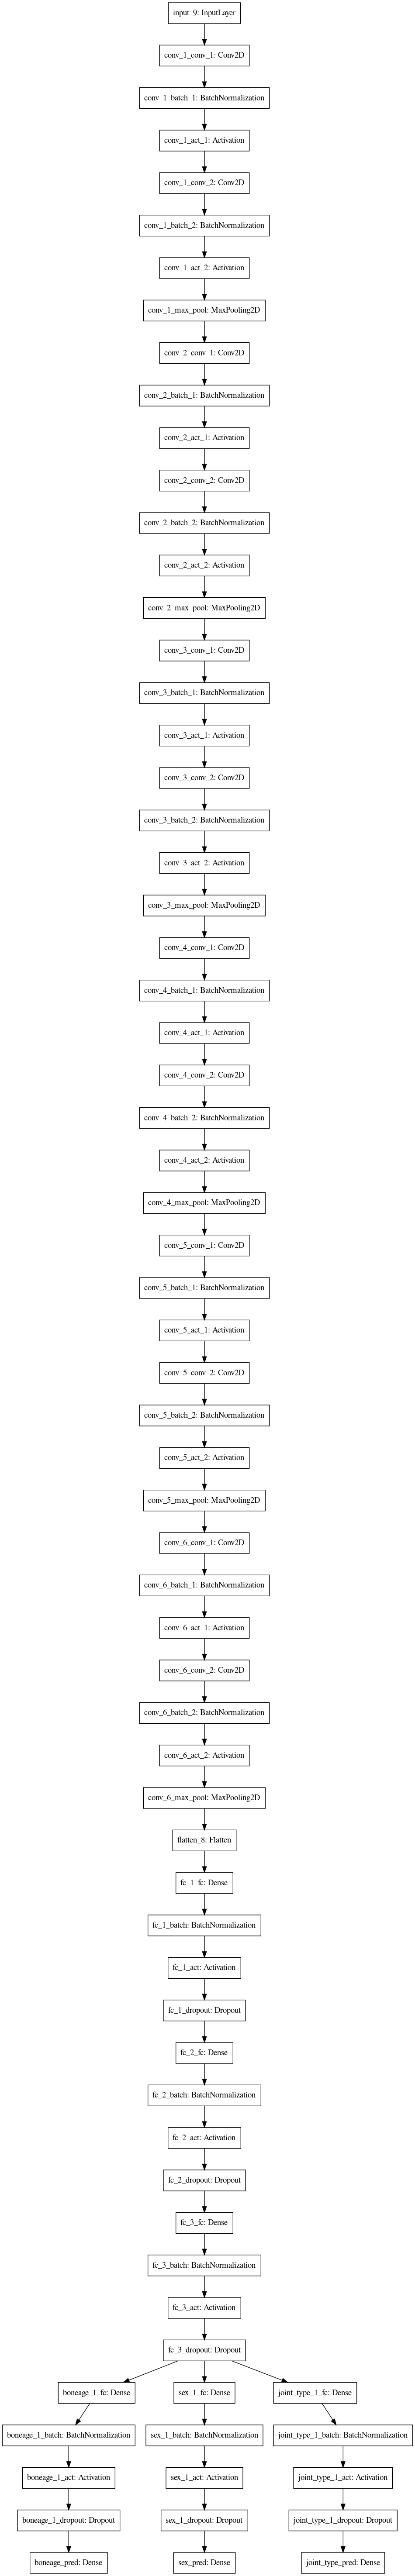

In [58]:
keras.utils.plot_model(RSNA_NEW_MODEL)